In [ ]:
%qtconsole

# Expectation Maximization (theory)
Please see slides 14-15 in `ML-Clustering-L2.pdf` for an explanation of the Expecation Maximization algorithm. Let $D = \{x_1,...,x_n\}\subseteq \mathbb{R}^d$. Recall that in the EM algorithm we represent a cluster $C_i$ by a Gaussian distribution whose density function is given by

$$
\Pr(x|C_i) = \frac{1}{\sqrt{(2\pi)^d|\Sigma_i|}}\cdot e^{-\frac{1}{2}\cdot (x-\mu_i)^\intercal\cdot (\Sigma_i)^{-1}\cdot (x-\mu_i)}.
$$

Each cluster $C_i$ is parameterized with a cluster mean $\mu_i\in\Bbb R^d$, a covariance matrix $\Sigma_i\in\Bbb R^{d\times d}$ and a prior probability $\Pr(C_i)$.

<!--Given a clustering $M = \{C_1,\ldots,C_k\}$, we can compute
$$
\Pr(x) = \sum_{i=1}^k \Pr(C_i)\cdot\Pr(x|C_i),
$$
where we estimate $\Pr(C_i)$ by $W_i$, the frequency of the cluster $C_i$ in the data (i.e. the ratio of data points belonging to cluster $C_i$).-->

The Expectation Maximization has two steps: Expectation and Maximization (hence the name). Before this step we need to initialize an initial clustering $M = \{C_1,\ldots,C_k\}$. This is done as follows: 
- Choose cluster mean $\mu_i\in\Bbb R^d$ uniformly at random (in the adequate region). 
- Initialize the covariance matrix $\Sigma_i\in\Bbb R^{d\times d}$ as the identity matrix. 
- Initialize the prior probability $\Pr(C_i)$ is to $\frac{1}{k}$. 


Then we repeat the following two steps until the sum $\sum_{i=1}^k \|\mu_i - \mu'_i\|$ is below certain prespecified threshold $\epsilon$ (where $\mu'_i$ and $\mu_i$ are the means computed in two consecutive executions).

- <b>Update probabilities (expectation step):</b> For each all pairs $C_i$ and $x_j$ compute $\Pr(C_i|x_j) = \frac{\Pr(x_j|C_i)\cdot \Pr(C_i)}{\Pr(x_j)}$. <br>
  To do this we need to compute $\Pr(x_j|C_i)$ and $\Pr(x_j)$. Compute $\Pr(x_j|C_i)$ by the formula above, and compute $\Pr(x)$ by $\Pr(x)= \sum_{i=1}^k \Pr(C_i)\cdot\Pr(x|C_i)$.<br><br>
  
- <b>Update clustering (maximization step): </b>Compute a new model $M = \{C_1,\ldots, C_k\}$ by recomputing $W_i$, $\mu_i$ and $\Sigma_i$ as

$$
W_i = \frac{1}{n}\cdot\sum_{x\in D}\Pr(C_i|x)\approx P(C_i),
\qquad
\mu_i = \frac{\sum_{x\in D}^n x\Pr(C_i|x)}{\sum_{x\in D} \Pr(C_i|x)},
\qquad
\Sigma_i = \frac{\sum_{x\in D} \Pr(C_i|x)\cdot(x-\mu_i)\cdot(x-\mu_i)^\intercal}{\sum_{x\in D} \Pr(C_i|x)}.
$$

<b>Question 1:</b> What is the objective of Expectation Maximization (EM) clustering problem? 

HINT: See slides pages 14-15. 

<!--<b>Question 1 (b): </b>Rewrite the objective for $\text{dist}(x,y)=||x-y||$-->

<b>Question 2:</b> What are the E-step, M-step? What is estimated, what is fixed?

<b>Question 3:</b> Does EM algorithm provide any guarantees for finding the optimal solution?

HINT: What is the optimal solution? 

<b>Question 4:</b> Can a cluster of a EM clustering be empty? 

HINT: Since we are dealing with probabilities, what would it mean for a cluster to be 'empty'?

<b>Question 5:</b> In which of the two step does the EM algorithm attempt to maximize the objective function?

<b>Question 6:</b> Is EM algorithm guaranteed to converge? 

HINT: Assume the objective is strictly decreasing. 

<b>Question 7 (a): </b>How is Expectation Maximization Clustering a generalizaton of k-means clustering?

HINT: See the book [ZM] page 351. 

<b>Question 7 (b): </b>Could we assign a "hard clustering" of all points instead of a probability?

HINT: Which cluster is it most likely that $x_i$ belongs to?

<b>Question 7 (c): </b>Both models rely on certain assumptions on the data. What are these assumptions? Which assumptions are shared?

<b>Question 7 (d): </b>Give examples of data where the assumptions of k-means clustering and EM clustering are reasonable/unreasonable. (relevant for the exam)

<b>Bonus Question (Hard): </b>Baum-Welch training of Hidden Markov Models was also called Expectation Maximization. Are there any similarities/differences between the EM algorithm above and the Baum-Welch EM algorithm?

<!--
TODO: Some question that I thought about which would be nice to have is like a discussion about the differences between Kmeans and EM. The book points out (page 353) that EM is some kind of generalization of Kmeans, so in some sense it's more versatil (for example, it doesn't restrict us to convex clusters -right?- and it seems like the fact that the clusters are ''randomized'' allows us to do more things). What are the advantages/disadvantages of each? -->

# Expectation Maximization (code)
In this exercise you must implement the EM algorithm. To test our implementation we will need data. Like last week we use the Iris dataset. Recall that the dataset has three clases so we <i>cheat</i> by setting $k=3$.

In [1]:
# Load the Iris data set
import sklearn.datasets
iris = sklearn.datasets.load_iris()
X = iris['data'][:,0:2] # reduce dimensions so we can plot what happens.
k = 3
print(X.shape)

(150, 2)


## Implementing EM algorithm

In this section we will implement the Expectation Maximization algorithm. 


<!-- The algorithm returns a clustering $M = \{C_1,\ldots,C_k\}$. This corresponds to a 
 - sequence of means $(\mu_1,\ldots,\mu_k)$ where each $\mu_i\in\Bbb R^d$,
 - sequence of covariance matrices $(\Sigma_1,\ldots,\Sigma_k)$ where each $\Sigma_i\in\Bbb R^{d\times d}$,
 - prior probabilities $(\Pr(C_1),\ldots,\Pr(C_k))$. -->

Given $x$ we can then compute the probability of $x$ conditioned on the $i$'th cluster $Pr(C\mid x_i)$. If we want to assign $x$ to a specific cluster we compute $(\Pr(x|C_1),\ldots,\Pr(x|C_k))$ and assign $x$ to the `arg max`.

The following helper function takes a description of a Gaussian Mixture ($\mu_i$'s, $\Sigma_i$'s and $\Pr(C_i)$'s)) and returns the probability densities of each point. We represent the inputs as 

$$\text{means}=\begin{pmatrix}
- & \mu_1 & - \\
- & \vdots & - \\
- & \mu_k & - 
\end{pmatrix}\in \mathbb{R}^{k\times d} \quad\quad
\text{priors}=\begin{pmatrix}
\Pr(C_1)\\
\vdots \\
\Pr(C_k)
\end{pmatrix}\in \mathbb{R}^{k}
$$

Similarly we represent the $\Sigma_i$'s as $\text{covs}\in\mathbb{R}^{k\times d \times d}$. 
<!--If you want more information you can take a look at scipy's [multivariate_normal](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html) documentation.-->

In [3]:
import numpy as np
from scipy.stats import multivariate_normal

def compute_probs_cx(points, means, covs, priors):
    '''
    Input
      - points: (n times d) array containing the dataset
      - means:  (k times d) array containing the k means
      - covs:   (k times d times d) array such that cov[j,:,:] is the covariance matrix of the j-th Gaussian.
      - priors: (k) array containing priors
    Output
      - probs:  (k times n) array such that the entry (i,j) represents Pr(C_i|x_j)
    '''
    # Convert to nunmpy arrays.
    points, means, covs = np.asarray(points), np.asarray(means), np.asarray(covs)
    priors = np.asarray(priors)
    
    # Get sizes
    n, d = points.shape
    k = means.shape[0]
    
    # Make sure sizes are valid
    assert d == means.shape[1] == covs.shape[1] == covs.shape[2], "The dimensions of points, means, covs and priors should all be equal."
    assert k == covs.shape[0] == priors.shape[0], "The number of gaussians in means, covs and prios should all be equal."

    # Compute probabilities
    prob = []
    for i in range(k):
        if priors[i] < 1 / k ** 3: # TODO: consider removing this; would it give numerical issues? Ask Mathias. 
            prob.append(np.zeros(n))
        else:
            prob.append(
                priors[i] *
                multivariate_normal.pdf(
                    mean=means[i], cov=covs[i], x=points))
    
    # This will be a (k, n) matrix where the (i,j)'th entry is Pr(C_i)*Pr(x_j|C_i).
    prob = np.array(prob)
    assert prob.shape == (k, n)
    
    # The sum of the j'th column of this matrix is P(x_j); why?
    p_x = np.sum(prob, axis=0, keepdims=True) 
    assert p_x.shape == (1, n)
    
    # Divide the j'th column by P(x_j). The the (i,j)'th then 
    # becomes Pr(C_i)*Pr(x_j)|C_i)/Pr(x_j) = Pr(C_i|x_j)
    prob = prob / p_x

    # The sum of the j'th column should now sum to 1; why?
    assert np.allclose(prob.sum(axis=0), 1)
    
    return prob, p_x

The following helper function computes the most likely class of each point under a given Gaussian Mixture.

The following is the basic structure for the EM algorithm. Your task is to fill in the missing parts (indicated as usual by the string `#YOUR CODE HERE`)

In [78]:
def em_algorithm(X, k, T, epsilon = 0.001, means=None):
    """ Clusters the data X into k clusters using the Expectation Maximization algorithm. 
    
        Parameters
        ----------
        X : Data matrix of shape (n, d)
        k : Number of clusters.
        T : Maximum number of iterations
        epsilon :  Stopping criteria for the EM algorithm. Stops if the means of
                   two consequtive iterations are less than epsilon.
        means : (k times d) array containing the k initial means (optional)
        
        Returns
        -------
        means:     (k, d) array containing the k means
        covs:      (k, d, d) array such that cov[j,:,:] is the covariance matrix of 
                   the Gaussian of the j-th cluster
        probs_c:   (k, ) containing the probability Pr[C_i] for i=0,...,k. 
        llh:       The log-likelihood of the clustering (this is the objective we want to maximize)
    """
    n, d = X.shape
    
    # Initialize and validate mean
    if means is None: 
        means = np.random.rand(k, d)

    # Initialize cov, prior
    probs_x  = np.zeros(n) #
    probs_cx = np.zeros((k, n)) #
    probs_c  = np.zeros(k) + np.random.rand(k)
    
    covs = np.zeros((k, d, d))
    for i in range(k): covs[i] = np.identity(d)
    probs_c = np.ones(k) / k

    
    # Column names
    print("Iterations\tLLH")
    
    close = False
    old_means = np.zeros_like(means)
    iterations = 0
    while not(close) and iterations < T:
        old_means[:] = means # This allows us to actually copy the array mean

        # Expectation step
        probs_cx, probs_x = compute_probs_cx(X, means, covs, probs_c)
        assert probs_cx.shape == (k, n)
        
        # Maximization step
        # YOUR CODE HERE
        for i in range(0, k):

            # re-estimate means, covs and probs_c
            row = probs_cx[i, :]
            assert row.shape == (n,), row.shape
            sum_x_probs_cx = sum(row)
            
            probs_c[i] = 1/n * sum_x_probs_cx
            means[i]   = sum([X[j]*probs_cx[i,j] for j in range(n)]) / sum_x_probs_cx
            covs[i]    = sum([probs_cx[i,j]*np.outer(X[j]-means[i], X[j]-means[i]) for j in range(n)]) / sum_x_probs_cx
        # END CODE
        
        # Compute per-sample average log likelihood (llh) of this iteration     
        llh = 1/n*np.sum(np.log(probs_x))
        print(iterations+1, "\t\t", llh)

        # Stop condition
        dist = np.sqrt(((means - old_means) ** 2).sum(axis=1))
        close = np.all(dist < epsilon)
        iterations += 1
        
    # Validate output
    assert means.shape == (k, d)
    assert covs.shape == (k, d, d)
    assert probs_c.shape == (k,)
    return means, covs, probs_c, llh

# Load the Iris data set
import sklearn.datasets
iris = sklearn.datasets.load_iris()
X = iris['data'][:,0:2] # reduce dimensions so we can plot what happens.
k = 3

means, covs, priors, llh = em_algorithm(X, 3, 100, 0.001)

Iterations	LLH
1 		 -18.2227369642
2 		 -1.79986894195
3 		 -1.79867540643
4 		 -1.79678967702
5 		 -1.79349752002
6 		 -1.78791106583
7 		 -1.77957033492
8 		 -1.76917455637
9 		 -1.75780416626
10 		 -1.74554586264
11 		 -1.73108709643
12 		 -1.71146972049
13 		 -1.68180084326
14 		 -1.63538540592
15 		 -1.57041759102
16 		 -1.52118653691
17 		 -1.51053350176
18 		 -1.50920356719
19 		 -1.54349021571
20 		 -1.50674609562
21 		 -1.50674540005
22 		 -1.50674536638
23 		 -1.50674536398
24 		 -1.5067453638
25 		 -1.50674536379
26 		 -1.50674536378
27 		 -1.50674536378
28 		 -1.50674536378
29 		 -1.50674536378
30 		 -1.50674536378
31 		 -1.50674536378
32 		 -1.50674536378
33 		 -1.50674536378
34 		 -1.50674536378
35 		 -1.50674536378
36 		 -1.50674536378
37 		 

/home/ubudevml/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/home/ubudevml/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in less


-1.50674536378
38 		 -1.50674536378
39 		 -1.50674536378
40 		 -1.50674536378
41 		 -1.50674536378
42 		 -1.50674536378
43 		 -1.50674536378
44 		 -1.50674536378
45 		 -1.50674536378
46 		 -1.50674536378
47 		 -1.50674536378
48 		 -1.50674536378
49 		 -1.50674536378
50 		 -1.50674536378
51 		 -1.50674536378
52 		 -1.50674536378
53 		 -1.50674536378
54 		 -1.50674536378
55 		 -1.50674536378
56 		 -1.50674536378
57 		 -1.50674536378
58 		 -1.50674536378
59 		 -1.50674536378
60 		 -1.50674536378
61 		 -1.50674536378
62 		 -1.50674536378
63 		 -1.50674536378
64 		 -1.50674536378
65 		 -1.50674536378
66 		 -1.50674536378
67 		 -1.50674536378
68 		 -1.50674536378
69 		 -1.50674536378
70 		 -1.50674536378
71 		 -1.50674536378
72 		 -1.50674536378
73 		 -1.50674536378
74 		 -1.50674536378
75 		 -1.50674536378
76 		 -1.50674536378
77 		 -1.50674536378
78 		 -1.50674536378
79 		 -1.50674536378
80 		 -1.50674536378
81 		 -1.50674536378
82 		 -1.50674536378
83 		 -1.50674536378
84 		 -1.5067453637

The random initialization usually causes the algorithm to get stuck at different local maximum. This causes different runs to get different scores. In practice this is usually handled by running the algorithm several times and picking the best run. 

The following code runs EM algorithm 50 times and plots the score of each run. Because the data set is fairly small, $n=150$, most of the runs will get the same score. 

<IPython.core.display.Javascript object>


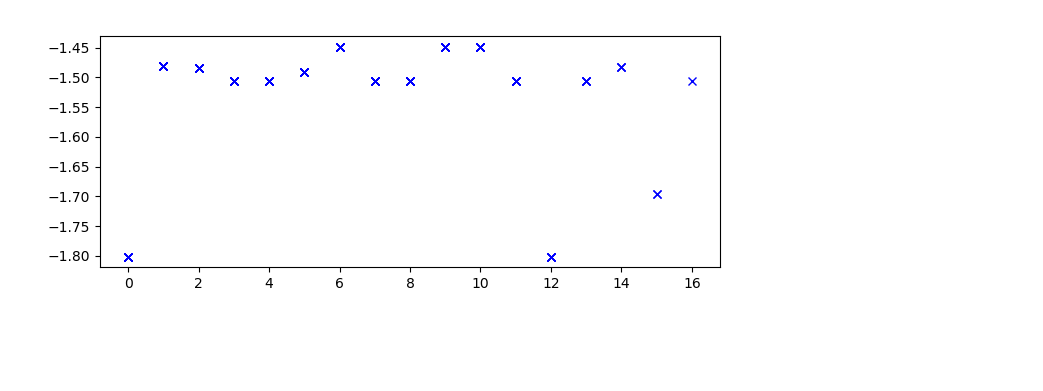

Iterations	LLH
1 		 -18.2984017249
2 		 -1.83088411058
3 		 -1.80086299227
4 		 -1.80086299227
5 		 -1.80086299227
6 		 -1.80086299227
7 		 -1.80086299227
8 		 -1.80086299227
9 		 -1.80086299227
10 		 -1.80086299227
11 		 -1.80086299227
12 		 -1.80086299227
13 		 -1.80086299227
14 		 -1.80086299227
15 		 -1.80086299227
16 		 -1.80086299227
17 		 -1.80086299227
18 		 -1.80086299227
19 		 -1.80086299227
20 		 -1.80086299227
21 		 -1.80086299227
22 		 -1.80086299227
23 		 -1.80086299227
24 		 -1.80086299227
25 		 -1.80086299227
26 		 -1.80086299227
27 		 -1.80086299227
28 		 -1.80086299227
29 		 -1.80086299227
30 		 -1.80086299227


/home/ubudevml/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/home/ubudevml/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in less


31 		 -1.80086299227
32 		 -1.80086299227
33 		 -1.80086299227
34 		 -1.80086299227
35 		 -1.80086299227
36 		 -1.80086299227
37 		 -1.80086299227
38 		 -1.80086299227
39 		 -1.80086299227
40 		 -1.80086299227
41 		 -1.80086299227
42 		 -1.80086299227
43 		 -1.80086299227
44 		 -1.80086299227
45 		 -1.80086299227
46 		 -1.80086299227
47 		 -1.80086299227
48 		 -1.80086299227
49 		 -1.80086299227
50 		 -1.80086299227
51 		 -1.80086299227
52 		 -1.80086299227
53 		 -1.80086299227
54 		 -1.80086299227
55 		 -1.80086299227
56 		 -1.80086299227
57 		 -1.80086299227
58 		 -1.80086299227
59 		 -1.80086299227
60 		 -1.80086299227
61 		 -1.80086299227
62 		 -1.80086299227
63 		 -1.80086299227
64 		 -1.80086299227
65 		 -1.80086299227
66 		 -1.80086299227
67 		 -1.80086299227
68 		 -1.80086299227
69 		 -1.80086299227
70 		 -1.80086299227
71 		 -1.80086299227
72 		 -1.80086299227
73 		 -1.80086299227
74 		 -1.80086299227
75 		 -1.80086299227
76 		 -1.80086299227
77 		 -1.80086299227
78 		 -1.8008

Iterations	LLH
1 		 -19.5348037088
2 		 -1.79604682599
3 		 -1.78992160182
4 		 -1.78094223367
5 		 -1.76923368661
6 		 -1.75508603571
7 		 -1.7368029772
8 		 -1.70983512368
9 		 -1.66640430572
10 		 -1.59976200235
11 		 -1.5376097255
12 		 -1.51283836369
13 		 -1.50299805169
14 		 -1.49729637569
15 		 -1.49374296195
16 		 -1.49149106365
17 		 -1.48998025743
18 		 -1.48887781386
19 		 -1.48798489867
20 		 -1.48715821685
21 		 -1.4862737967
22 		 -1.48522474849
23 		 -1.48395150114
24 		 -1.48249209677
25 		 -1.48099374894
26 		 -1.47962952663
27 		 -1.47849141112
28 		 -1.47757492114
29 		 -1.4768312995
30 		 -1.47620951829
31 		 -1.47567013823
32 		 -1.47518500358
33 		 -1.47473342123
34 		 -1.47429851774
35 		 -1.47386435585
36 		 -1.47341346014
37 		 -1.47292416423
38 		 -1.47236705075
39 		 -1.47169949843
40 		 -1.47085695723
41 		 -1.46973945248
42 		 -1.46819409134
43 		 -1.466006817
44 		 -1.46295797171
45 		 -1.45906003711
46 		 -1.45494191538
47 		 -1.45166115018
48 		 -1.4496

43 		 -1.50674536378
44 		 -1.50674536378
45 		 -1.50674536378
46 		 -1.50674536378
47 		 -1.50674536378
48 		 -1.50674536378
49 		 -1.50674536378
50 		 -1.50674536378
51 		 -1.50674536378
52 		 -1.50674536378
53 		 -1.50674536378
54 		 -1.50674536378
55 		 -1.50674536378
56 		 -1.50674536378
57 		 -1.50674536378
58 		 -1.50674536378
59 		 -1.50674536378
60 		 -1.50674536378
61 		 -1.50674536378
62 		 -1.50674536378
63 		 -1.50674536378
64 		 -1.50674536378
65 		 -1.50674536378
66 		 -1.50674536378
67 		 -1.50674536378
68 		 -1.50674536378
69 		 -1.50674536378
70 		 -1.50674536378
71 		 -1.50674536378
72 		 -1.50674536378
73 		 -1.50674536378
74 		 -1.50674536378
75 		 -1.50674536378
76 		 -1.50674536378
77 		 -1.50674536378
78 		 -1.50674536378
79 		 -1.50674536378
80 		 -1.50674536378
81 		 -1.50674536378
82 		 -1.50674536378
83 		 -1.50674536378
84 		 -1.50674536378
85 		 -1.50674536378
86 		 -1.50674536378
87 		 -1.50674536378
88 		 -1.50674536378
89 		 -1.50674536378
90 		 -1.5067

79 		 -1.69580874482
80 		 -1.69580874353
81 		 -1.6958087425
82 		 -1.69580874166
83 		 -1.69580874098
84 		 -1.69580874043
85 		 -1.69580873999
86 		 -1.69580873963
87 		 -1.69580873934
88 		 -1.69580873911
89 		 -1.69580873892
90 		 -1.69580873877
91 		 -1.69580873865
92 		 -1.69580873855
93 		 -1.69580873847
94 		 -1.6958087384
95 		 -1.69580873835
96 		 -1.69580873831
97 		 -1.69580873827
98 		 -1.69580873824
99 		 -1.69580873822
100 		 -1.6958087382
Iterations	LLH
1 		 -18.8907957333
2 		 -1.83773743868
3 		 -1.79971083407
4 		 -1.79872944128
5 		 -1.79700809419
6 		 -1.79391737825
7 		 -1.78862645013
8 		 -1.78067613461
9 		 -1.77069207358
10 		 -1.75951906527
11 		 -1.74679406547
12 		 -1.73069614948
13 		 -1.70784813614
14 		 -1.67267123946
15 		 -1.61742441172
16 		 -1.5505473227
17 		 -1.51574204192
18 		 -1.5080073741
19 		 -1.50687217153
20 		 -1.50675603777
21 		 -1.50674621464
22 		 -1.50674543062
23 		 -1.50674536901
24 		 -1.50674536419
25 		 -1.50674536382
26 		 -1.50

LinAlgError: singular matrix

In [79]:
%matplotlib notebook 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8,3))    
llhs = []

for i in range(100):
    _, _, _, llh = em_algorithm(X, 3, 100)
    llhs.append(llh)
    ax.plot(llhs, 'bx')
    fig.canvas.draw() #tODO: compute hard clustering and see kmeasn score?

To check your implementation you should run <a href="http://scikit-learn.org/stable/modules/mixture.html">sklearn</a>'s implementation of the EM algorithm. You might want to take a look at the documentation to get a better understanding of what the algorithm is actually doing.

<!--By default the implementation repeats the algorithm $10$ times and picks the best result. A sanity check for your implementation of Lloyd's algorithm is to check that the scores are roughly the same. -->

In [91]:
from sklearn.mixture import GaussianMixture as EM
expectation_maximization = EM(n_components=3, init_params='kmeans', covariance_type='diag', verbose=2, verbose_interval =1).fit(X)
print(expectation_maximization.score(X))

Initialization 0
  Iteration 0	 time lapse 0.00459s	 ll change inf
  Iteration 1	 time lapse 0.00055s	 ll change 0.02220
  Iteration 2	 time lapse 0.00061s	 ll change 0.00588
  Iteration 3	 time lapse 0.00036s	 ll change 0.00368
  Iteration 4	 time lapse 0.00064s	 ll change 0.00367
  Iteration 5	 time lapse 0.00047s	 ll change 0.00357
  Iteration 6	 time lapse 0.00057s	 ll change 0.00272
  Iteration 7	 time lapse 0.00057s	 ll change 0.00156
  Iteration 8	 time lapse 0.00039s	 ll change 0.00072
Initialization converged: True	 time lapse 0.00901s	 ll -1.62954
-1.62924957014


To get a visual understanding of the algorithm, the following code visualizes each step of the algorithm. Just copy and paste the answer from your implementation from above and run. (the visualization has a few bugs, but it gives a rough idea of what happens. I'll upload a fixed version ASAP)

<IPython.core.display.Javascript object>


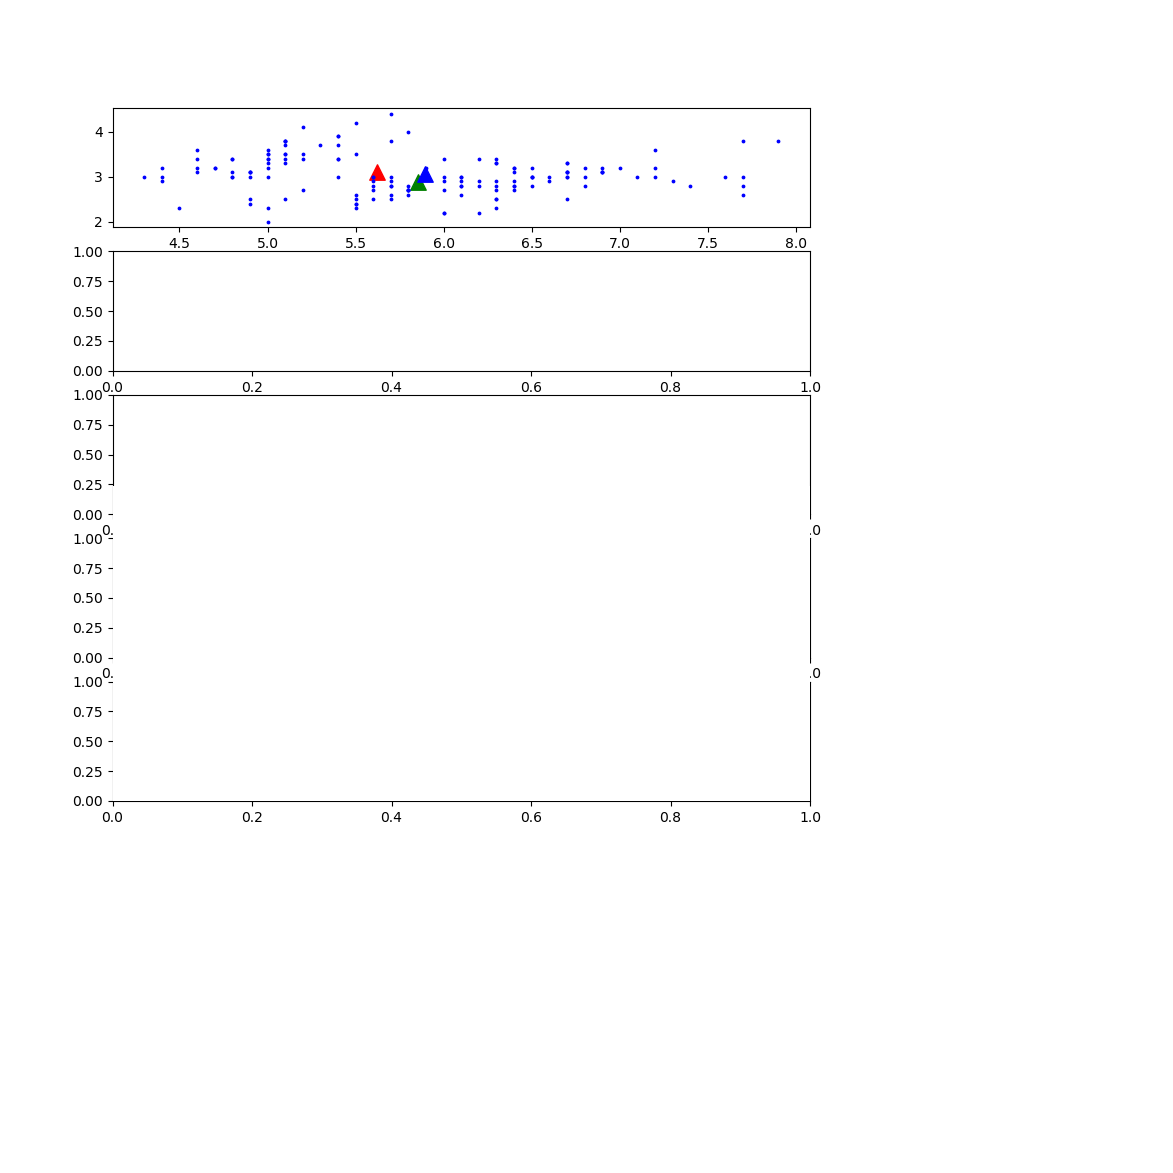

Iterations	LLH
1 		 -19.7756145416
2 		 -1.79928602055
3 		 -1.7974124577


KeyboardInterrupt: 

In [82]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import numpy as np
import time
from mpl_toolkits.mplot3d import Axes3D

def em_algorithm_visualize(X, k, T, epsilon = 0.001, means=None):
    """ Clusters the data X into k clusters using the Expectation Maximization algorithm. 
    
        Parameters
        ----------
        X : Data matrix of shape (n, d)
        k : Number of clusters.
        T : Maximum number of iterations
        epsilon :  Stopping criteria for the EM algorithm. Stops if the means of
                   two consequtive iterations are less than epsilon.
        means : (k times d) array containing the k initial means (optional)
        
        Returns
        -------
        means:     (k, d) array containing the k means
        covs:      (k, d, d) array such that cov[j,:,:] is the covariance matrix of 
                   the Gaussian of the j-th cluster
        probs_c:   (k, ) containing the probability Pr[C_i] for i=0,...,k. 
        llh:       The log-likelihood of the clustering (this is the objective we want to maximize)
    """
    n, d = X.shape
    
    # Initialize subplot for visualization
    fig, (ax, _, _, _, _) = plt.subplots(5, 1, figsize=(9,9)) 
    ax.axis('off')
    colors = ["r", "g", "b"]
    
    # https://matplotlib.org/examples/mplot3d/mixed_subplots_demo.html
    ax3d = fig.add_subplot(2, 1, 2, projection='3d')
    ax3d1 = fig.add_subplot(3, 1, 2, projection='3d')
    ax3d2 = fig.add_subplot(4, 1, 2, projection='3d')
    ax3d3 = fig.add_subplot(5, 1, 2, projection='3d')
    
    # Initialize and validate mean
    if means is None: 
        means = np.random.rand(k, d)

    # Initialize cov, prior
    probs_x  = np.zeros(n) #
    probs_cx = np.zeros((k, n)) #
    probs_c  = np.zeros(k) + np.random.rand(k)/10**3 # rand noise init
    probs_c = probs_c / np.sum(probs_c) # normalize so sum to 1. 
    
    covs = np.zeros((k, d, d))
    for i in range(k): covs[i] = np.identity(d)
    probs_c = np.ones(k) / k

    # END CODE
    
    # Column names
    print("Iterations\tLLH")
    
    close = False
    old_means = np.zeros_like(means)
    iterations = 0
    while not(close) and iterations < T:
        old_means[:] = means # This allows us to actually copy the array mean

        # Expectation step
        probs_cx, probs_x = compute_probs_cx(X, means, covs, probs_c)
        assert probs_cx.shape == (k, n)
        
        # Maximization step
        for i in range(0, k):

            # re-estimate means, covs and probs_c
            row = probs_cx[i, :]
            assert row.shape == (n,), row.shape
            sum_x_probs_cx = sum(row)
            
            probs_c[i] = 1/n * sum_x_probs_cx
            means[i]   = sum([X[j]*probs_cx[i,j] for j in range(n)]) / sum_x_probs_cx
            covs[i]    = sum([probs_cx[i,j]*np.outer(X[j]-means[i], X[j]-means[i]) for j in range(n)]) / sum_x_probs_cx
        
        # Compute the llh of this iteration
        # YOUR CODE HERE
        #llh = np.log(1/n * np.prod(probs_x))       
        llh = 1/n*np.sum(np.log(probs_x))
        # END CODE
        print(iterations+1, "\t\t", llh)

        # Finish condition
        dist = np.sqrt(((means - old_means) ** 2).sum(axis=1))
        close = np.all(dist < epsilon)
        iterations += 1
        
        # Extra code for visualization
        centroids = means
        # W matrix (i,j) says Pr[C_i, x_j]
        # assign each x_i to the cluster C_i that maximizes P(C_i x_j)
        clustering = np.argmax(probs_cx, axis=0)
        assert clustering.shape == (n,), clustering.shape
        
        # Draw clusters
        ax.cla()
        for j in range(k):
            centroid = centroids[j]
            c = colors[j]
            ax.scatter(centroid[0], centroid[1], s=123, c=c, marker='^')
            data = X[clustering==j]
            x = data[:,0]
            y = data[:,1]
            ax.scatter(x, y, s=3, c=c)
            
        # draw 3d gaussians. 
        #Create grid and multivariate normal
        xs = np.linspace(4,7, 30)
        ys = np.linspace(2,4.5, 30)
        Xs, Ys = np.meshgrid(xs, ys)
        pos = np.empty(Xs.shape + (2,))
        pos[:, :, 0] = Xs; pos[:, :, 1] = Ys
        prob_space = sum([multivariate_normal(means[j], covs[j]).pdf(pos) for j in range(k)])

        #Make a 3D plot
        ax3d.plot_surface(Xs, Ys, prob_space, cmap='viridis', linewidth=0)
        
        ax3d1.plot_surface(Xs, Ys, multivariate_normal(means[0], covs[0]).pdf(pos), cmap='viridis', linewidth=0)
        ax3d2.plot_surface(Xs, Ys, multivariate_normal(means[1], covs[1]).pdf(pos), cmap='viridis', linewidth=0)
        ax3d3.plot_surface(Xs, Ys, multivariate_normal(means[2], covs[2]).pdf(pos), cmap='viridis', linewidth=0)
        
        fig.canvas.draw()    
        
    # Validate output
    assert means.shape == (k, d)
    assert covs.shape == (k, d, d)
    assert probs_c.shape == (k,)
    return means, covs, probs_c, llhs

# Load the Iris data set
import sklearn.datasets
iris = sklearn.datasets.load_iris()
X = iris['data'][:,0:2] # reduce dimensions so we can plot what happens.
k = 3

means, covs, priors, llh = em_algorithm_visualize(X, 3, 100, 0.001)

## Initializing EM with Lloyd's algorithm 

So far we have been initializing the means for the Expectation Maximization algorithm at random. We could also make a mix of Lloyd's algorithm and EM algorithm by running Lloyd's algorithm first to obtain the initial means for the EM algorithm. 

Begin by copying and pasting the implementation of Lloyd's algorithm from the previous week

In [ ]:
def lloyds_algorithm(X, k, T):
    """ Clusters the data of X into k clusters using T iterations of Lloyd's algorithm. 
    
        Parameters
        ----------
        X : Data matrix of shape (n, d)
        k : Number of clusters.
        T : Maximum number of iterations to run Lloyd's algorithm. 
        
        Returns
        -------
        clustering: A vector of shape (n, ) where the i'th entry holds the cluster of X[i].
        centroids:  The centroids/average points of each cluster. 
        cost:       The cost of the clustering 
    """
    pass

Then use this algorithm to initialize the means for the EM algorithm. For this notice that `em_algorithm` accepts an optional input for the initial means.

Also, notice that the sklearn's implementation of the EM algorithm can take this initialization into account. Can you look through the documentation and find out what lines should be changed when we used sklearn before? This would be very useful for testing and comparing your implementation above.

In [ ]:
# YOUR CODE HERE
# END CODE

<b>Question:</b> Why can we use Lloyd's algorithm to initialize the EM algorithm? Does it (always) give a better final clustering? If so, why is that the case?

## Evaluating the clustering using silhuette coefficient
In the lecture Ira talked about how one can compare different clusters.

In [ ]:
def silhouette(data, clustering): 
    n, d = data.shape
    k = np.unique(clustering)[-1]+1

    # YOUR CODE HERE
    silh = None
    # END CODE

    return silh

silhouette(X, clustering)

Calcualte the Silhouette coefficient for the EM clustering. 

# Clustering digits
In previous weeks we did supervised learning on images of digits. In this exercise we will perform clustering on digits. Remember clustering can be considered a type of unsupervised learning. The main difference to what we did before is that  will attempt to find patterns in the data without using the labels.  

You can use the AUDigits if you want. The following code uses a data set of images called MNIST. They are almost identical. The only reason for using MNIST is that we can import it with just two lines of code. 

In [ ]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/")

X = mnist.train.images
y = mnist.train.labels

print(X.shape)

The following code runs the Expectation Maimization algorithm on 5000 images from the MNIST dataset. It then visualizes the found centroids. 

In [92]:
# One cluster for each digit
k = 10

# Run EM algorithm on 1000 images from the MNIST dataset. 
mean, cov, prior, llh = em_algorithm(X[:1000], k, 50)
clustering = most_likely(X, mean, cov, prior)

print(mean.shape)
fig, ax = plt.subplots(1, k, figsize=(8, 1))

for i in range(k):
    ax[i].imshow(mean[i].reshape(28, 28), cmap='gray')
    
plt.show()

Iterations	LLH
1 		 -19.6577165725
2 		 -1.79167780239
3 		 -1.78186404291
4 		 -1.76979587989
5 		 -1.75578954447
6 		 -1.7402160943
7 		 -1.72226510078
8 		 -1.69894126248
9 		 -1.66544213588
10 		 -1.62159163133
11 		 -1.58099325139
12 		 -1.55129505959
13 		 -1.53104388712
14 		 -1.5162764914
15 		 -1.50447308375
16 		 -1.49502257943
17 		 -1.48741222073
18 		 -1.48076181035
19 		 -1.47427808318
20 		 -1.46759112174
21 		 -1.46090625426
22 		 -1.45419431849
23 		 -1.4473208519
24 		 -1.44129724752
25 		 -1.43684046836
26 		 -1.43368421404
27 		 -1.43129924539
28 		 -1.42931423618
29 		 -1.42749431322
30 		 -1.42566019328
31 		 -1.42363262333
32 		 -1.4211788714
33 		 -1.41798630829
34 		 -1.41379913291
35 		 -1.40869091929
36 		 -1.40242048831
37 		 -1.39267743072
38 		 -1.37420296656
39 		 -1.35481261596
40 		 -1.33818983579
41 		 -1.31965755065
42 		 -1.30943185357
43 		 -1.30337929577
44 		 -1.29698572847
45 		 -1.2901129127
46 		 -1.28381639909
47 		 -1.27684789677
48 		 -1.267

LinAlgError: singular matrix

TODO: Again, these two questions are from the previous week, but they still make sense here, so it would be worth recalling in the session

<b>Question 1: </b>Why do the centroids look like images of digits? TODO: Change for EM.

<b>Question 2: </b>Is it possible that not all digits are present? Why could this happen?

TODO: Check if we can use the distribution to generate new images in each cluster

TODO: Exercise about the f1 coefficient (I couldn't find it in the first slides of 2016, so I'm unsure if they will get this taught next week, most likely it will be the week after that one, and we can leave that for the handin actually)

## Bonus: PCA Vs. taking two coordinates

Save as question for next week or the week after; talk with ALlan. 


The goal of this section is to get a visual idea about how PCA compares to simply taking projections.

The following are two helper functions that will be in charge of plotting the data. The first one takes $n$ points in $\Bbb R^d$ and returns a set of graphs consisting of each pair of components of these vectors. The second one is a particular case of the first one where we only plot two dimensions of the $d$ possible dimensions. You can safely ignore the implementation of these two functions, and explore how they're used in the upcoming sections.

In [ ]:
%matplotlib inline
def plot_matrix(x, y, group, fmt='.', **kwargs):
    """
    Given two d-dimensional datasets of n points,
    makes a figure containing d x d plots, where the (i, j) plot
    plots the ith dimension against the jth dimension.
    """

    x = np.asarray(x)
    y = np.asarray(y)
    group = np.squeeze(np.asarray(group))
    n, p = x.shape
    n_, q = y.shape
    n__, = group.shape
    assert n == n_ == n__
    groups = sorted(set(group))
    if isinstance(fmt, str):
        fmt = {k: fmt for k in groups}
    fig, axes = plt.subplots(p, q, squeeze=False, **kwargs)
    for i, axrow in enumerate(axes):
        for j, ax in enumerate(axrow):
            for g in groups:
                ax.plot(x[group == g, i], y[group == g, j], fmt[g])
            if len(axes) > 2:
                ax.locator_params(tight=True, nbins=4)

def plot_groups(x, group, fmt='.', **kwargs):
    """
    Helper function for plotting a 2-dimensional dataset with groups
    using plot_matrix.
    """
    n, d = x.shape
    assert d == 2
    x1 = x[:, 0].reshape(n, 1)
    x2 = x[:, 1].reshape(n, 1)
    plot_matrix(x1, x2, group, fmt, **kwargs)

In [ ]:
iris = sklearn.datasets.load_iris()
data = iris['data']
labels = iris['target']

Below you can find 16 images. The plot in position $(i,j)$ represents the graph obtained by taking only coordinates $i$ and $j$ from the dataset.

In [ ]:
plot_matrix(data, data, labels, {0: 'o', 1: 's', 2: '^'}, figsize=(6, 6))

Another way of dealing with the data set in just two dimensions is by applying **principal component analysis** (PCA). As discussed in class, Allan will have much more to say about this during the last few weeks, but if you're interested you can start by taking a look at these [lecture notes](http://cs229.stanford.edu/notes/cs229-notes10.pdf). 

By now we only need to know that PCA allows us transform data in several dimensions to two-dimensional data, without having a significant loss in information. Fortunately, sklearn contains a class to compute exactly this.

In [ ]:
import sklearn.datasets
import sklearn.decomposition

# Load Iris data set
iris = sklearn.datasets.load_iris()
data = iris['data']
labels = iris['target']
# Apply PCA
pca = sklearn.decomposition.PCA(2)
data_pca = pca.fit_transform(data)
# Plot
plot_groups(data_pca, labels, {0: 'o', 1: 's', 2: '^'}, figsize=(4, 4))

<b>Question:</b> Compare the two approaches, is the PCA approach much better than taking subset of coordinates?